# DSO110 - Final Group Project - Lottery
Alberta "Albi" Kovatcheva and Barbra Treston



## Background
Albi and Barbra have chosen the “Mega Millions Winning Numbers” dataset because the lottery is something that is familiar and accessible to a wide range of people worldwide; it would be difficult to find someone who hasn’t dreamed of hitting the jackpot and changing their life forever. However, it is also widely accepted that the lottery is not set up to favor the player.  In the case of Mega Millions, although there is a 1 in 24 chance of winning something, the odds of choosing all 6 numbers correctly to win the jackpot is 1 in 302,575,350 - a fact that is posted openly on both the New York Lottery and Mega Millions websites.  By analyzing the winning numbers data as well as complementary datasets on lottery retailers, lottery aid to local school districts, and monies recouped from the lottery winnings of public aid recipients, Albi and Barbra hope to glean insight to make actionable suggestions on how lottery players can get the best return on their investment as well as to demonstrate for the average person whether the lottery serves any societal good or whether it may be best to abstain from playing altogether. 





## Data Wrangling

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import nan
import datetime as dt
from datetime import date

### Import data 

### 1. Winning numbers May 17, 2002 to November 26, 2021

In [25]:
Winning_Numbers = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
pd.set_option("display.max_columns", None)
Winning_Numbers.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [26]:
Winning_Numbers = Winning_Numbers.rename(columns={'Mega Ball': 'Mega_Ball'})

#### Extract month, day, year, weekday, and quarter from 'Draw Date'.

In [27]:
Winning_Numbers['Draw Date']= pd.to_datetime(Winning_Numbers['Draw Date'])
Winning_Numbers['month'] = pd.DatetimeIndex(Winning_Numbers['Draw Date']).month
Winning_Numbers['day'] = pd.DatetimeIndex(Winning_Numbers['Draw Date']).day
Winning_Numbers['year'] = pd.DatetimeIndex(Winning_Numbers['Draw Date']).year
Winning_Numbers['weekday'] = pd.DatetimeIndex(Winning_Numbers['Draw Date']).dayofweek
Winning_Numbers['weekday1'] = pd.DatetimeIndex(Winning_Numbers['Draw Date']).day_name()
Winning_Numbers['quarter'] = pd.DatetimeIndex(Winning_Numbers['Draw Date']).quarter
Winning_Numbers.head()

,Draw Date,Winning Numbers,Mega_Ball,Multiplier,month,day,year,weekday,weekday1,quarter
0,2020-09-25,20 36 37 48 67,16,2.0,9,25,2020,4,Friday,3
1,2020-09-29,14 39 43 44 67,19,3.0,9,29,2020,1,Tuesday,3
2,2020-10-02,09 38 47 49 68,25,2.0,10,2,2020,4,Friday,4
3,2020-10-06,15 16 18 39 59,17,3.0,10,6,2020,1,Tuesday,4
4,2020-10-09,05 11 25 27 64,13,2.0,10,9,2020,4,Friday,4


In [28]:
Winning_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Draw Date        2036 non-null   datetime64[ns]
 1   Winning Numbers  2036 non-null   object        
 2   Mega_Ball        2036 non-null   int64         
 3   Multiplier       1133 non-null   float64       
 4   month            2036 non-null   int64         
 5   day              2036 non-null   int64         
 6   year             2036 non-null   int64         
 7   weekday          2036 non-null   int64         
 8   weekday1         2036 non-null   object        
 9   quarter          2036 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 159.2+ KB


#### Convert 'Winning Numbers' to string and then separate terms into individual columns (5).

In [29]:
Winning_Numbers["Winning Numbers"]= Winning_Numbers["Winning Numbers"].astype(str)

In [30]:
Winning_Numbers[['Ball1','Ball2',"Ball3","Ball4","Ball5"]] =  Winning_Numbers['Winning Numbers'].str.split(' ', expand=True)
Winning_Numbers.drop(columns =["Winning Numbers"], inplace = True)
Winning_Numbers.head()

,Draw Date,Mega_Ball,Multiplier,month,day,year,weekday,weekday1,quarter,Ball1,Ball2,Ball3,Ball4,Ball5
0,2020-09-25,16,2.0,9,25,2020,4,Friday,3,20,36,37,48,67
1,2020-09-29,19,3.0,9,29,2020,1,Tuesday,3,14,39,43,44,67
2,2020-10-02,25,2.0,10,2,2020,4,Friday,4,09,38,47,49,68
3,2020-10-06,17,3.0,10,6,2020,1,Tuesday,4,15,16,18,39,59
4,2020-10-09,13,2.0,10,9,2020,4,Friday,4,05,11,25,27,64


### 2. Jackpots Wins May 17, 2002 to October 22, 2021

In [31]:
Winners = pd.read_csv("jackpot winners.csv")
pd.set_option("display.max_columns", None)

Winners.head()

,Date,amount won,cash prize,location,state,gender
0,5/17/2002,23300000,NaN,"Chatham, Ill.",IL,Mixed
1,5/24/2002,23300000,NaN,"Chicago, Ill.",IL,F
2,7/16/2002,23300000,NaN,"Cliffside Park, N.J.",NJ,M
3,8/27/2002,23300000,NaN,"New York City, N.Y.",NY,Mixed
4,9/6/2002,23300000,NaN,"Kentwood, Mich.",MI,M


In [32]:
Winners.rename(columns={'Date': 'Draw Date', ' amount  won ':'Amount', 'location':'Location', 'state':'State', 'gender':'Gender'}, inplace=True)
Winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Draw Date   223 non-null    object 
 1   Amount      223 non-null    int64  
 2   cash prize  18 non-null     float64
 3   Location    223 non-null    object 
 4   State       220 non-null    object 
 5   Gender      223 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.6+ KB


In [33]:
Winners['Draw Date']= pd.to_datetime(Winners['Draw Date'])
Winners['Win'] = 'Y'
Winners['Jackpot'] = 'Y'

In [34]:
Wins = pd.DataFrame(Winners.groupby('Draw Date')['Amount'].sum())
Wins.rename(columns={'Amount':'JackpotAmount'}, inplace=True)
Wins

,JackpotAmount
Draw Date,
2002-05-17,23300000
2002-05-24,23300000
2002-07-16,23300000
2002-08-27,23300000
2002-09-06,23300000
...,...
2021-02-23,1050000000
2021-05-21,516000000
2021-09-07,55000000


### 3. Non-Jackpot Wins October 16, 2012 to November 26, 2021


In [35]:
SmallWinners = pd.read_csv("nonjackpot winners.csv")
pd.set_option("display.max_columns", None)
SmallWinners.head()

,Draw Date,Prize,Gender,City,State
0,11/26/2021,2000000,M,Washtenaw County,MI
1,9/21/2021,30000,M,Baltimore,MD
2,8/31/2021,3000000,M,New Berlin,WI
3,8/20/2021,1000000,F,Newport News,VA
4,7/27/2021,3000000,Unk,Grand Strand,SC


In [36]:
SmallWinners.rename(columns={'Date': 'Draw Date', 'Prize':'Amount', 'City':'Location'}, inplace=True)
SmallWinners['Draw Date']= pd.to_datetime(SmallWinners['Draw Date'])
SmallWinners['Win'] = 'Y'
SmallWinners['Jackpot'] = 'N'

In [37]:
SmallWins = pd.DataFrame(SmallWinners.groupby('Draw Date')['Amount'].sum())
SmallWins.rename(columns={'Amount':'NonJackpotAmount'}, inplace=True)
SmallWins

,NonJackpotAmount
Draw Date,
2012-10-16,3005000
2012-11-27,50000000
2013-10-25,479070
2013-11-01,1000000
2013-11-05,410115
...,...
2021-07-27,3000000
2021-08-20,1000000
2021-08-31,3000000


### Merging the Datasets

#### A. Winning Numbers plus Total Jackpot and Non-Jackpot Winnings

In [38]:
Prizes = Wins.merge(SmallWins, how='outer', on='Draw Date')
Prizes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2002-05-17 to 2021-11-26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JackpotAmount     198 non-null    float64
 1   NonJackpotAmount  213 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


In [39]:
Winning_Numbers = Winning_Numbers.merge(Prizes, how='left', on='Draw Date')

In [40]:
Winning_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Draw Date         2036 non-null   datetime64[ns]
 1   Mega_Ball         2036 non-null   int64         
 2   Multiplier        1133 non-null   float64       
 3   month             2036 non-null   int64         
 4   day               2036 non-null   int64         
 5   year              2036 non-null   int64         
 6   weekday           2036 non-null   int64         
 7   weekday1          2036 non-null   object        
 8   quarter           2036 non-null   int64         
 9   Ball1             2036 non-null   object        
 10  Ball2             2036 non-null   object        
 11  Ball3             2036 non-null   object        
 12  Ball4             2036 non-null   object        
 13  Ball5             2036 non-null   object        
 14  JackpotAmount     198 no

In [41]:
Winning_Numbers

,Draw Date,Mega_Ball,Multiplier,month,day,year,weekday,weekday1,quarter,Ball1,Ball2,Ball3,Ball4,Ball5,JackpotAmount,NonJackpotAmount
0,2020-09-25,16,2.0,9,25,2020,4,Friday,3,20,36,37,48,67,NaN,NaN
1,2020-09-29,19,3.0,9,29,2020,1,Tuesday,3,14,39,43,44,67,NaN,NaN
2,2020-10-02,25,2.0,10,2,2020,4,Friday,4,09,38,47,49,68,NaN,NaN
3,2020-10-06,17,3.0,10,6,2020,1,Tuesday,4,15,16,18,39,59,NaN,NaN
4,2020-10-09,13,2.0,10,9,2020,4,Friday,4,05,11,25,27,64,NaN,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,2021-11-12,15,2.0,11,12,2021,4,Friday,4,30,32,42,46,48,NaN,NaN
2032,2021-11-16,3,3.0,11,16,2021,1,Tuesday,4,06,22,44,53,65,NaN,NaN
2033,2021-11-19,18,5.0,11,19,2021,4,Friday,4,05,23,52,53,59,NaN,NaN
2034,2021-11-23,6,3.0,11,23,2021,1,Tuesday,4,07,24,54,57,58,NaN,NaN


##### Export data to excel file.

In [42]:
Winning_Numbers.to_csv('Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_Wrangled.csv')

#### B. Jackpot & Non-Jackpot Winners

In [45]:
AllWinners = pd.merge(Winners, SmallWinners, on=['Draw Date', 'Amount','Location', 'State', 'Gender', 'Win', 'Jackpot'], how='outer')
AllWinners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Draw Date   497 non-null    datetime64[ns]
 1   Amount      497 non-null    int64         
 2   cash prize  18 non-null     float64       
 3   Location    497 non-null    object        
 4   State       494 non-null    object        
 5   Gender      497 non-null    object        
 6   Win         497 non-null    object        
 7   Jackpot     497 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 34.9+ KB


##### Export data to excel file.

In [46]:
AllWinners.to_csv('AllWinners.csv')

## Machine Learning

### Decision Tree. 
Based on Balls 1-5, to what extent can I predict the megaball?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### See Data Types.

In [25]:
Winning_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Draw Date         2036 non-null   datetime64[ns]
 1   Mega_Ball         2036 non-null   int64         
 2   Multiplier        1133 non-null   float64       
 3   month             2036 non-null   int64         
 4   day               2036 non-null   int64         
 5   year              2036 non-null   int64         
 6   weekday           2036 non-null   int64         
 7   weekday1          2036 non-null   object        
 8   quarter           2036 non-null   int64         
 9   Ball1             2036 non-null   object        
 10  Ball2             2036 non-null   object        
 11  Ball3             2036 non-null   object        
 12  Ball4             2036 non-null   object        
 13  Ball5             2036 non-null   object        
 14  JackpotAmount     198 no

### Set data types.

In [26]:
Winning_Numbers.Ball1 = Winning_Numbers.Ball1.astype(int)
Winning_Numbers.Ball2 = Winning_Numbers.Ball2.astype(int)
Winning_Numbers.Ball3 = Winning_Numbers.Ball3.astype(int)
Winning_Numbers.Ball4 = Winning_Numbers.Ball4.astype(int)
Winning_Numbers.Ball5 = Winning_Numbers.Ball5.astype(int)
Winning_Numbers.Mega_Ball = Winning_Numbers.Mega_Ball.astype(int)
# Titanic.fare = Titanic.fare.astype(int)

### See Data Types Again.

In [27]:
Winning_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Draw Date         2036 non-null   datetime64[ns]
 1   Mega_Ball         2036 non-null   int32         
 2   Multiplier        1133 non-null   float64       
 3   month             2036 non-null   int64         
 4   day               2036 non-null   int64         
 5   year              2036 non-null   int64         
 6   weekday           2036 non-null   int64         
 7   weekday1          2036 non-null   object        
 8   quarter           2036 non-null   int64         
 9   Ball1             2036 non-null   int32         
 10  Ball2             2036 non-null   int32         
 11  Ball3             2036 non-null   int32         
 12  Ball4             2036 non-null   int32         
 13  Ball5             2036 non-null   int32         
 14  JackpotAmount     198 no

### Specify Predictor and Response Variables.

In [28]:
x = Winning_Numbers.drop(['Draw Date', 'Multiplier', 'month', 'day', 'year', 'weekday', 'weekday1', 'quarter', 'JackpotAmount', 'NonJackpotAmount'], axis=1)
y = Winning_Numbers['Mega_Ball']
# x = Titanic.drop('survived', axis=1)
# y = Titanic['survived']

In [29]:
type(y)

pandas.core.series.Series

### Train-Test-Split.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.50)

### Implement Decision Tree.

In [31]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [32]:
treePredictions = decisionTree.predict(x_test)
treePredictions

array([21, 14,  5, ..., 20, 25, 15])

In [33]:
treePredictions = decisionTree.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))
# 1. Support is the number of actual occurrences of the class in the specified dataset.
# 2. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
# where N is the number of target classes. The matrix compares the actual target values with those predicted 
# by the machine learning model.

[[35  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        39
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        32
          15       1.00      1.00

C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [34]:
# Redundant
print(confusion_matrix(y_test, treePredictions))

[[35  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  6]]


In [35]:
# Redundant
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        39
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        18
          18       1.00    

C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\betre\anaconda3\lib\site-packages\sklearn\metrics\_cla

###  Previous Decision Tree Did Not Work. Trying random forest.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [37]:
Winning_Numbers2 = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_Wrangled.csv")
Winning_Numbers2.head()

,Unnamed: 0,Draw Date,Mega_Ball,Multiplier,month,day,year,weekday,weekday1,quarter,Ball1,Ball2,Ball3,Ball4,Ball5,JackpotAmount,NonJackpotAmount
0,0,2020-09-25,16,2.0,9,25,2020,4,Friday,3,20,36,37,48,67,NaN,NaN
1,1,2020-09-29,19,3.0,9,29,2020,1,Tuesday,3,14,39,43,44,67,NaN,NaN
2,2,2020-10-02,25,2.0,10,2,2020,4,Friday,4,9,38,47,49,68,NaN,NaN
3,3,2020-10-06,17,3.0,10,6,2020,1,Tuesday,4,15,16,18,39,59,NaN,NaN
4,4,2020-10-09,13,2.0,10,9,2020,4,Friday,4,5,11,25,27,64,NaN,2000000.0


In [38]:
Winning_Numbers2.set_index('Unnamed: 0')

,Draw Date,Mega_Ball,Multiplier,month,day,year,weekday,weekday1,quarter,Ball1,Ball2,Ball3,Ball4,Ball5,JackpotAmount,NonJackpotAmount
Unnamed: 0,,,,,,,,,,,,,,,,
0,2020-09-25,16,2.0,9,25,2020,4,Friday,3,20,36,37,48,67,NaN,NaN
1,2020-09-29,19,3.0,9,29,2020,1,Tuesday,3,14,39,43,44,67,NaN,NaN
2,2020-10-02,25,2.0,10,2,2020,4,Friday,4,9,38,47,49,68,NaN,NaN
3,2020-10-06,17,3.0,10,6,2020,1,Tuesday,4,15,16,18,39,59,NaN,NaN
4,2020-10-09,13,2.0,10,9,2020,4,Friday,4,5,11,25,27,64,NaN,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,2021-11-12,15,2.0,11,12,2021,4,Friday,4,30,32,42,46,48,NaN,NaN
2032,2021-11-16,3,3.0,11,16,2021,1,Tuesday,4,6,22,44,53,65,NaN,NaN
2033,2021-11-19,18,5.0,11,19,2021,4,Friday,4,5,23,52,53,59,NaN,NaN


In [39]:
Winning_Numbers2 = Winning_Numbers2.rename(columns={'Unnamed: 0': 'RealIndex'})

In [40]:
Winning_Numbers2.drop(columns={'Index'})

KeyError: "['Index'] not found in axis"

In [ ]:
x = Winning_Numbers2.drop(['Draw Date', 'Multiplier', 'month', 'day', 'year', 'weekday', 'weekday1', 'quarter', 'JackpotAmount', 'NonJackpotAmount'], axis=1)
y = Winning_Numbers2['Mega_Ball']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [ ]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

In [ ]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500, 1000]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

In [ ]:
plt.plot(n_estimators_array, results)

In [ ]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

In [ ]:
#rf = RandomForestClassifier(n_estimators=500)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [ ]:
rf_random.fit(x_train, y_train)

In [ ]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

In [ ]:
feature_importances.plot(kind='barh', figsize=(7,6))

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# %matplotlib inline
# from sklearn import metrics


In [ ]:
# Winning_Numbers['Ball1'] =Winning_Numbers['Ball1'].astype('category')
# Winning_Numbers['Ball2'] =Winning_Numbers['Ball2'].astype('category')
# Winning_Numbers['Ball3'] =Winning_Numbers['Ball3'].astype('category')
# Winning_Numbers['Ball4'] =Winning_Numbers['Ball4'].astype('category')
# Winning_Numbers['Ball5'] =Winning_Numbers['Ball5'].astype('category')
# Winning_Numbers['Mega Ball'] =Winning_Numbers['Mega Ball'].astype('category')

# cat_feat = ['Mega Ball','Multiplier']
# for feat in cat_feat:
#     Winning_Numbers[feat] = Winning_Numbers[feat].astype('category')

In [ ]:
# x = realestate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [ ]:
# y = realestate['Y house price of unit area']


In [ ]:
# Winning_Numbers1 = LinearRegression()
# Winning_Numbers1.fit(x_train, y_train)

# lm = LinearRegression()
# lm.fit(x_train, y_train)

In [ ]:
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
#          normalize=False)

In [ ]:
# X = Winning_Numbers.drop(['Mega Ball'],axis=1)
# y = Winning_Numbers['Mega Ball']

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix
#models = []
#models.append(("LR",LogisticRegression(solver='liblinear')))
#print(models)

In [ ]:
#import statsmodels.formula.api as smf
#model_fit3 = smf.logit(formula='MegaBall ~C(Ball1)+C(Ball2)', data=winning_numbers).fit()

## Copied from Lotto 3 file

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import nan
import datetime as dt
from datetime import date

In [10]:
Winning_Numbers = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
pd.set_option("display.max_columns", None)
Winning_Numbers.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [11]:
Winning_Numbers["AllNumbers"] = Winning_Numbers["Winning Numbers"].map(str) + " " + Winning_Numbers["Mega Ball"].map(str)

In [12]:
Winning_Numbers

,Draw Date,Winning Numbers,Mega Ball,Multiplier,AllNumbers
0,09/25/2020,20 36 37 48 67,16,2.0,20 36 37 48 67 16
1,09/29/2020,14 39 43 44 67,19,3.0,14 39 43 44 67 19
2,10/02/2020,09 38 47 49 68,25,2.0,09 38 47 49 68 25
3,10/06/2020,15 16 18 39 59,17,3.0,15 16 18 39 59 17
4,10/09/2020,05 11 25 27 64,13,2.0,05 11 25 27 64 13
...,...,...,...,...,...
2031,11/12/2021,30 32 42 46 48,15,2.0,30 32 42 46 48 15
2032,11/16/2021,06 22 44 53 65,3,3.0,06 22 44 53 65 3
2033,11/19/2021,05 23 52 53 59,18,5.0,05 23 52 53 59 18
2034,11/23/2021,07 24 54 57 58,6,3.0,07 24 54 57 58 6


In [13]:
df = Winning_Numbers['AllNumbers']
df2 = pd.DataFrame(df.str.split(" ").apply(pd.Series, 0).stack())
df2.index = df2.index.droplevel(-1)
df2.head(20)

,0
0,20
0,36
0,37
0,48
0,67
0,16
1,14
1,39
1,43
1,44


In [15]:
df3 = Winning_Numbers['Draw Date']
df4 = Winning_Numbers['Weekday1']

KeyError: 'Weekday1'

In [ ]:
merged = pd.merge(df3, df2,how='inner', left_index=True, right_index=True)
merged.columns = ['Date','WinNumber']
merged.reset_index(inplace=True)
merged.head(20)
merged2 = pd.merge(merged, df4,how='inner', left_index=True, right_index=True)
merged2.columns = ['Index','Date','WinNumber','WeekdayEncoded']
merged2.head()

,Index,Date,WinNumber,WeekdayEncoded
0,0,9/25/2020,20,1
1,0,9/25/2020,36,0
2,0,9/25/2020,37,1
3,0,9/25/2020,48,0
4,0,9/25/2020,67,1


In [ ]:
merged2[['Month','Day','Year']] =  merged2['Date'].str.split('/', expand=True)
merged2.head()

,Index,Date,WinNumber,WeekdayEncoded,Month,Day,Year
0,0,9/25/2020,20,1,9,25,2020
1,0,9/25/2020,36,0,9,25,2020
2,0,9/25/2020,37,1,9,25,2020
3,0,9/25/2020,48,0,9,25,2020
4,0,9/25/2020,67,1,9,25,2020


In [ ]:
merged2['WinNumber'] = merged2['WinNumber'].astype(int)
merged2['Year'] = merged2['Year'].astype(int)
merged2['Day'] = merged2['Day'].astype(int)


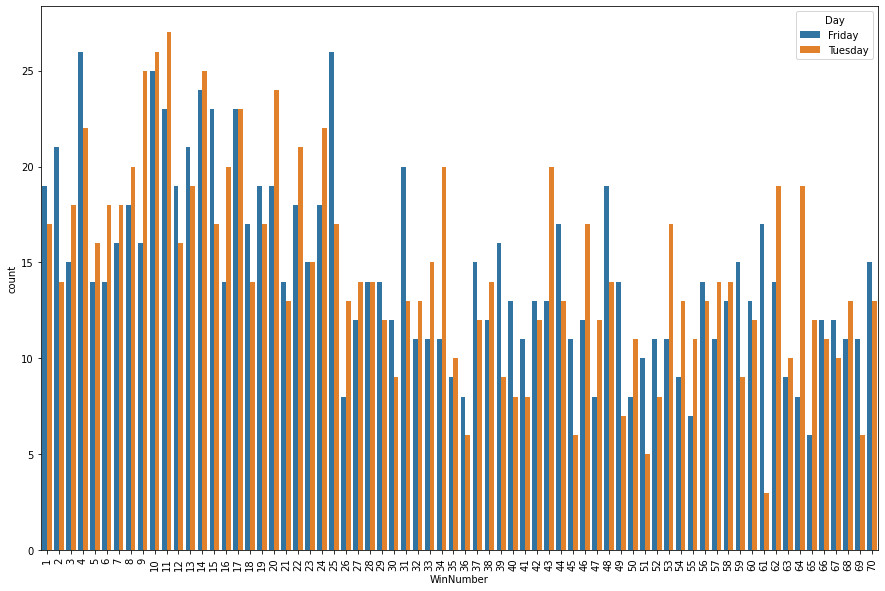

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="WinNumber", hue="WeekdayEncoded", data=merged2)
plt.legend(title='Day', loc='upper right', labels=['Friday', 'Tuesday'])
plt.xticks(rotation = 'vertical')
plt.show()

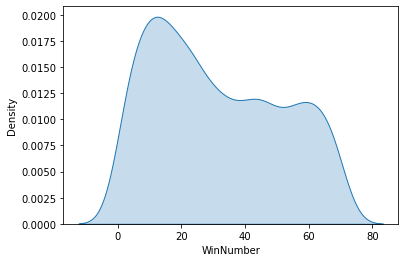

In [ ]:
import numpy as np
sns.kdeplot(merged2["WinNumber"],shade=True)
plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
fvalue, pvalue = stats.f_oneway(merged2["WinNumber"],merged2['WeekdayEncoded'])
print(pvalue)


0.0
